# **Importando Dados e Bibliotecas**

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [79]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


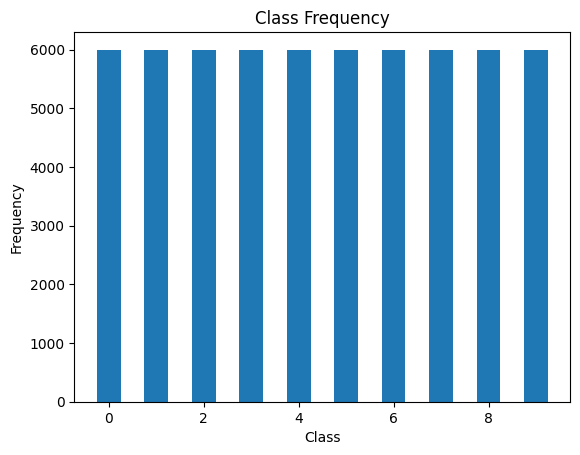

In [3]:
unique, counts = np.unique(y_train_full, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

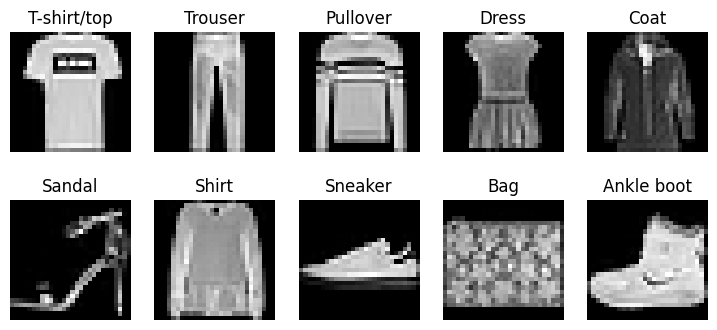

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, ax = plt.subplots(2, 5, figsize = (9, 4))

i = 0
while i != 10:
    j = 0
    while y_train_full[j] != i:
        j += 1
    ax[i//5, i%5].imshow(X_train_full[j], cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("%s"%class_names[y_train_full[j]])
    i += 1
    
plt.show()

In [80]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# **Escolha dos parâmetros**

## Profundidade e Neurônios

In [35]:
neurons = [100, 200, 300]
for neu in neurons:
    model = keras.models.Sequential([
     keras.layers.Flatten(input_shape=[28, 28]),       #converte a matriz 28x28 em um vetor 1x784
     keras.layers.Dense(neu, activation="relu"),       #1° layer com neu neurônios
     keras.layers.Dense(10, activation="softmax")      #layer de saída com 10 células
    ])
    
    model.compile(loss="sparse_categorical_crossentropy",      #sem necessidade de usar one-hot
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),   #Stochastic Gradient Descent com learning_rate=0.001 por padrão
     metrics=["accuracy"])
    
    print('\x1b[93m', neu, ' neurônios \x1b[0m')
    history = model.fit(X_train, y_train, batch_size=32, verbose=0, epochs=10, validation_data=(X_valid, y_valid)) #batch_size=32 por padrão
    print("loss = ", "{:.{}f}".format(history.history['loss'][-1], 4))
    print("accuracy = ", "{:.{}f}".format(history.history['accuracy'][-1], 4))
    print("val_loss = ", "{:.{}f}".format(history.history['val_loss'][-1], 4))
    print("val_accuracy = ", "{:.{}f}".format(history.history['val_accuracy'][-1], 4))
    print()

for neu1 in neurons:
    for neu2 in neurons:
        model = keras.models.Sequential([
         keras.layers.Flatten(input_shape=[28, 28]),       #converte a matriz 28x28 em um vetor 1x784
         keras.layers.Dense(neu1, activation="relu"),      #1° layer com neu1 neurônios
         keras.layers.Dense(neu2, activation="relu"),      #2° layer com neu2 neurônios
         keras.layers.Dense(10, activation="softmax")      #layer de saída com 10 células
        ])

        model.compile(loss="sparse_categorical_crossentropy",      #sem necessidade de usar one-hot
         optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),   #Stochastic Gradient Descent com learning_rate=0.001 por padrão
         metrics=["accuracy"])

        print('\x1b[96m', neu1, ' e ', neu2, ' neurônios \x1b[0m')
        history = model.fit(X_train, y_train, batch_size=32, verbose=0, epochs=10, validation_data=(X_valid, y_valid)) #batch_size=32 por padrão
        print("loss = ", "{:.{}f}".format(history.history['loss'][-1], 4))
        print("accuracy = ", "{:.{}f}".format(history.history['accuracy'][-1], 4))
        print("val_loss = ", "{:.{}f}".format(history.history['val_loss'][-1], 4))
        print("val_accuracy = ", "{:.{}f}".format(history.history['val_accuracy'][-1], 4))
        print()
    

 100  neurônios 
loss =  0.5545
accuracy =  0.8169
val_loss =  0.5402
val_accuracy =  0.8198

 200  neurônios 
loss =  0.5477
accuracy =  0.8178
val_loss =  0.5301
val_accuracy =  0.8240

 300  neurônios 
loss =  0.5446
accuracy =  0.8209
val_loss =  0.5289
val_accuracy =  0.8310

 100  e  100  neurônios 
loss =  0.5217
accuracy =  0.8232
val_loss =  0.5061
val_accuracy =  0.8316

 100  e  200  neurônios 
loss =  0.5464
accuracy =  0.8151
val_loss =  0.5296
val_accuracy =  0.8234

 100  e  300  neurônios 
loss =  0.5386
accuracy =  0.8181
val_loss =  0.5238
val_accuracy =  0.8200

 200  e  100  neurônios 
loss =  0.5130
accuracy =  0.8265
val_loss =  0.4992
val_accuracy =  0.8350

 200  e  200  neurônios 
loss =  0.5100
accuracy =  0.8266
val_loss =  0.4966
val_accuracy =  0.8316

 200  e  300  neurônios 
loss =  0.5167
accuracy =  0.8247
val_loss =  0.4995
val_accuracy =  0.8352

 300  e  100  neurônios 
loss =  0.4992
accuracy =  0.8319
val_loss =  0.4832
val_accuracy =  0.8392

 300

## Funções de Ativação

### Problemas das Funções de Ativação

* **Sigmoid:** neurônios saturados "matam" os gradientes; o output não é centrado em zero, exp() é custoso computacionalmente
* **Tanh:** neurônios saturados "matam" os gradientes
* **ReLU:** o output não é centrado em zero; saturado na região negativa(x < 0), "matando" os gradientes
* **LeakyReLU:** exp() é custoso computacionalmente

In [7]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
leaky_relu2 = keras.layers.LeakyReLU(alpha=0.01)

elu = tf.keras.layers.ELU(alpha=1.0) #1 é o alpha usual

activations = ["relu", "sigmoid", "tanh", leaky_relu, leaky_relu2, elu]

names = ["relu", "sigmoid", "tanh", "leaky_relu - 0.2", "leaky_relu - 0.01", "elu"]

In [8]:
history = []
i = 0
for func in activations:
    model = keras.models.Sequential([
     keras.layers.Flatten(input_shape=[28, 28]),       #converte a matriz 28x28 em um vetor 1x784
     keras.layers.Dense(300, activation=func),         #1° layer com 300 células
     keras.layers.Dense(100, activation=func),         #2° layer com 100 células
     keras.layers.Dense(10, activation="softmax")      #layer de saída com 10 células
    ])
    
    model.compile(loss="sparse_categorical_crossentropy",      #sem necessidade de usar one-hot
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),   #Stochastic Gradient Descent com learning_rate=0.001 por padrão
     metrics=["accuracy"])
    
    print('\x1b[93m', names[i], '\x1b[0m')
    history.append(model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_valid, y_valid))) #batch_size=32 por padrão
    i += 1

 relu 
Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4494 - accuracy: 0.5868 - val_loss: 0.9872 - val_accuracy: 0.7066
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8663 - accuracy: 0.7267 - val_loss: 0.7596 - val_accuracy: 0.7592
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7210 - accuracy: 0.7674 - val_loss: 0.6652 - val_accuracy: 0.7826
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6483 - accuracy: 0.7915 - val_loss: 0.6090 - val_accuracy: 0.8038
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6020 - accuracy: 0.8038 - val_loss: 0.5748 - val_accuracy: 0.8144
 sigmoid 
Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2993 - accuracy: 0.2232 - val_loss: 2.2514 - val_accuracy: 0.3594
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 2.2244 - accuracy: 0.4151 - val_loss: 2.1947 - val

# **Treinamento e Teste**

## Usando ELU

In [42]:
elu = tf.keras.layers.ELU(alpha=1.0)

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),       #converte a matriz 28x28 em um vetor 1x784
 keras.layers.Dense(300, activation=elu),         #1° layer com 300 células
 keras.layers.Dense(100, activation=elu),         #2° layer com 100 células
 keras.layers.Dense(10, activation="softmax")      #layer de saída com 10 células
])

model.compile(loss="sparse_categorical_crossentropy",      #sem necessidade de usar one-hot
 optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),   #Stochastic Gradient Descent com learning_rate=0.001 por padrão
 metrics=["accuracy"])

In [43]:
weights, bias = model.layers[1].get_weights()
print(weights[0][0:4])
print(bias[0:4])

[ 0.02281285 -0.05409726  0.00699294 -0.02836911]
[0. 0. 0. 0.]


In [44]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 300)               235500    
                                                                 
 dense_63 (Dense)            (None, 100)               30100     
                                                                 
 dense_64 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_valid, y_valid)) #batch_size=32 por padrão

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1882 - accuracy: 0.6326 - val_loss: 0.8182 - val_accuracy: 0.7378
Epoch 2/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7465 - accuracy: 0.7562 - val_loss: 0.6754 - val_accuracy: 0.7796
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6500 - accuracy: 0.7864 - val_loss: 0.6122 - val_accuracy: 0.7964
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5980 - accuracy: 0.8012 - val_loss: 0.5693 - val_accuracy: 0.8116
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5646 - accuracy: 0.8120 - val_loss: 0.5439 - val_accuracy: 0.8184
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5407 - accuracy: 0.8185 - val_loss: 0.5224 - val_accuracy: 0.8258
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5229 - accuracy: 0.8229 - val_loss: 0.5105 - val_accuracy:

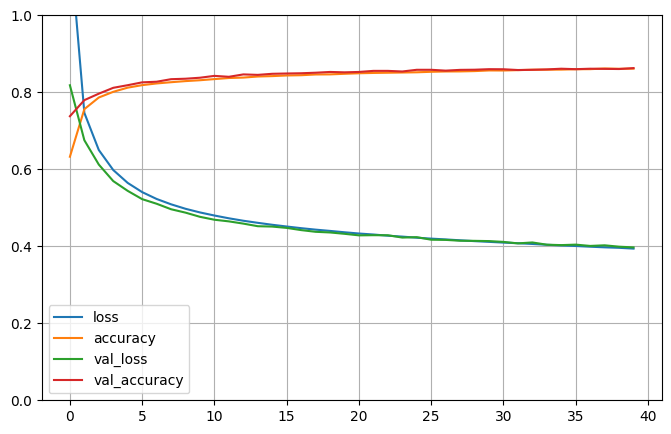

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [82]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8449


[0.4345766007900238, 0.8449000120162964]

## Usando ReLU

In [67]:
model2 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),       #converte a matriz 28x28 em um vetor 1x784
 keras.layers.Dense(300, activation="relu"),         #1° layer com 300 células
 keras.layers.Dense(100, activation="relu"),         #2° layer com 100 células
 keras.layers.Dense(10, activation="softmax")      #layer de saída com 10 células
])

model2.compile(loss="sparse_categorical_crossentropy",      #sem necessidade de usar one-hot
 optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),   #Stochastic Gradient Descent com learning_rate=0.001 por padrão
 metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid)) #batch_size=32 por padrão

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4485 - accuracy: 0.5871 - val_loss: 0.9751 - val_accuracy: 0.6998
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8625 - accuracy: 0.7257 - val_loss: 0.7531 - val_accuracy: 0.7604
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7196 - accuracy: 0.7691 - val_loss: 0.6577 - val_accuracy: 0.7856
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6468 - accuracy: 0.7913 - val_loss: 0.6018 - val_accuracy: 0.8090
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6003 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8176
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5683 - accuracy: 0.8132 - val_loss: 0.5411 - val_accuracy: 0.8212
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5448 - accuracy: 0.8185 - val_loss: 0.5210 - val_accuracy:

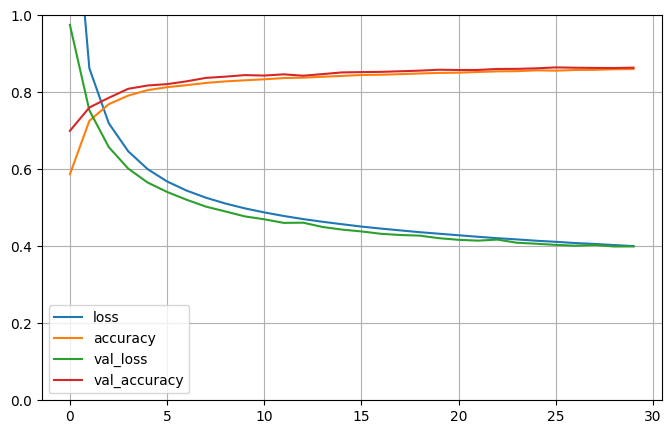

In [68]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [81]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.8457


[0.4410727024078369, 0.8457000255584717]